In [1]:
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

Using TensorFlow backend.


In [3]:
data1 = pd.read_csv('../stats_100_etfs.csv')
data = pd.read_csv('../hun_etfs.csv')
data

,date,open,high,low,close,volume,ticker
0,2015-01-05,204.17,204.37,201.35,201.72,169632646,SPY
1,2015-01-06,202.09,202.72,198.86,199.82,209151408,SPY
2,2015-01-07,201.42,202.72,200.88,202.31,125346709,SPY
3,2015-01-08,204.01,206.16,203.99,205.90,147217784,SPY
4,2015-01-09,206.40,206.42,203.51,204.25,158567288,SPY
...,...,...,...,...,...,...,...
125695,2019-12-24,22.82,22.82,22.77,22.78,2633089,BKLN
125696,2019-12-26,22.79,22.81,22.79,22.79,2999603,BKLN
125697,2019-12-27,22.79,22.80,22.78,22.79,2654723,BKLN
125698,2019-12-30,22.80,22.81,22.71,22.71,3697412,BKLN


In [4]:
df = data.loc[data['ticker'] == 'SPY']
df = df.set_index('date')
df

,open,high,low,close,volume,ticker
date,,,,,,
2015-01-05,204.17,204.37,201.35,201.72,169632646,SPY
2015-01-06,202.09,202.72,198.86,199.82,209151408,SPY
2015-01-07,201.42,202.72,200.88,202.31,125346709,SPY
2015-01-08,204.01,206.16,203.99,205.90,147217784,SPY
2015-01-09,206.40,206.42,203.51,204.25,158567288,SPY
...,...,...,...,...,...,...
2019-12-24,321.47,321.52,320.90,321.23,20270007,SPY
2019-12-26,321.65,322.95,321.64,322.94,31024188,SPY
2019-12-27,323.74,323.80,322.28,322.86,42554820,SPY


In [42]:
# from datetime import datetime
# df['date'] = pd.to_datetime(df['date'])

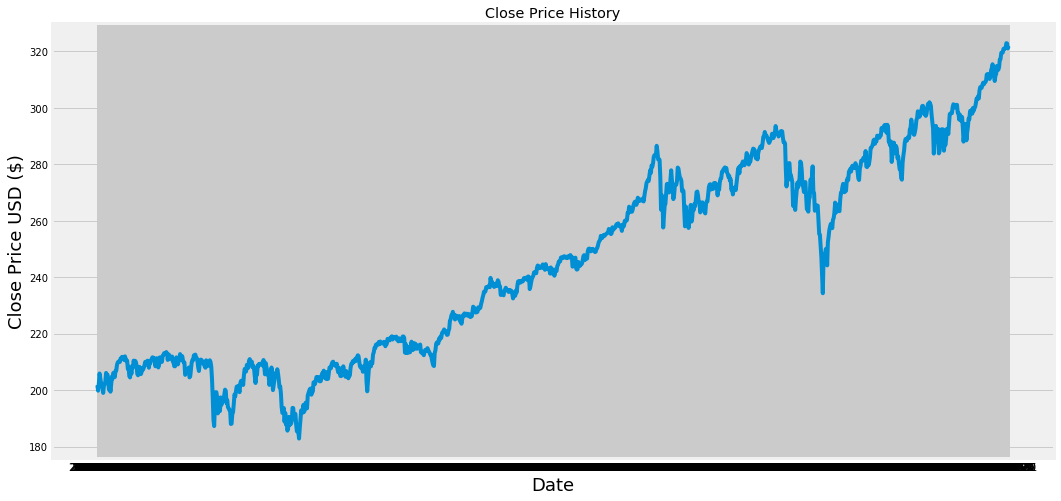

In [5]:
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(df['close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.savefig('spy_closeprice.png')
plt.show()

In [6]:
#Create a new dataframe with only the 'Close column
data = df[['close']]
#Convert the dataframe to a numpy array
dataset = data.values
#Get the number of rows to train the model on
training_data_len = math.ceil( len(dataset) * .95 )

training_data_len

1195

In [7]:
dataset

array([[201.72],
       [199.82],
       [202.31],
       ...,
       [322.86],
       [321.08],
       [321.86]])

In [8]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(data)

scaled_data

array([[0.13463735],
       [0.12107367],
       [0.13884923],
       ...,
       [0.9994289 ],
       [0.98672187],
       [0.99229012]])

In [9]:
#Create the training data set
#Create the scaled training data set
train_data = scaled_data[0:training_data_len , :]
#Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(30, len(train_data)):
  x_train.append(train_data[i-30:i, 0])
  y_train.append(train_data[i, 0])
  if i<= 31:
    print(x_train)
    print(y_train)
    print()

[array([0.13463735, 0.12107367, 0.13884923, 0.16447744, 0.15269846,
       0.14127641, 0.13720731, 0.128498  , 0.11536265, 0.13399486,
       0.13706453, 0.14434609, 0.1659052 , 0.15783838, 0.16126499,
       0.1419189 , 0.12335808, 0.13656482, 0.11843232, 0.13606511,
       0.15691034, 0.15134209, 0.16604797, 0.16197887, 0.15541119,
       0.17097373, 0.17183038, 0.18603655, 0.1921759 , 0.1945317 ])]
[0.1946744717304396]

[array([0.13463735, 0.12107367, 0.13884923, 0.16447744, 0.15269846,
       0.14127641, 0.13720731, 0.128498  , 0.11536265, 0.13399486,
       0.13706453, 0.14434609, 0.1659052 , 0.15783838, 0.16126499,
       0.1419189 , 0.12335808, 0.13656482, 0.11843232, 0.13606511,
       0.15691034, 0.15134209, 0.16604797, 0.16197887, 0.15541119,
       0.17097373, 0.17183038, 0.18603655, 0.1921759 , 0.1945317 ]), array([0.12107367, 0.13884923, 0.16447744, 0.15269846, 0.14127641,
       0.13720731, 0.128498  , 0.11536265, 0.13399486, 0.13706453,
       0.14434609, 0.1659052 , 0.1

In [31]:
x_train

array([[[0.13463735],
        [0.12107367],
        [0.13884923],
        ...,
        [0.18603655],
        [0.1921759 ],
        [0.1945317 ]],

       [[0.12107367],
        [0.13884923],
        [0.16447744],
        ...,
        [0.1921759 ],
        [0.1945317 ],
        [0.19467447]],

       [[0.13884923],
        [0.16447744],
        [0.15269846],
        ...,
        [0.1945317 ],
        [0.19467447],
        [0.19360366]],

       ...,

       [[0.75663906],
        [0.78148201],
        [0.76549115],
        ...,
        [0.81924615],
        [0.8148201 ],
        [0.80339806]],

       [[0.78148201],
        [0.76549115],
        [0.78233866],
        ...,
        [0.8148201 ],
        [0.80339806],
        [0.81317818]],

       [[0.76549115],
        [0.78233866],
        [0.78169617],
        ...,
        [0.80339806],
        [0.81317818],
        [0.7879783 ]]])

In [10]:
#Convert the x_train and y_train to numpy arrays 
x_train, y_train = np.array(x_train), np.array(y_train)

In [30]:
#Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
y_train.shape

(1165,)

In [12]:
#Build the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences= False))
model.add(Dense(25))
model.add(Dense(1))

In [13]:
#Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [14]:
#Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Epoch 1/1
1165/1165 [==============================] - 56s 48ms/step - loss: 0.0019


In [15]:
#Create the testing data set
#Create a new array containing scaled values from index 1543 to 2002 
test_data = scaled_data[training_data_len - 30: , :]
#Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(30, len(test_data)):
  x_test.append(test_data[i-30:i, 0])

In [16]:
#Convert the data to a numpy array
x_test = np.array(x_test)

In [17]:
#Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

In [18]:
#Get the models predicted price values 
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

In [19]:
#Get the root mean squared error (RMSE)
rmse=np.sqrt(np.mean(((predictions- y_test)**2)))
rmse

2.428315871871115

C:\Users\jayar\anaconda\Anaconda3\envs\PandaSpace\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


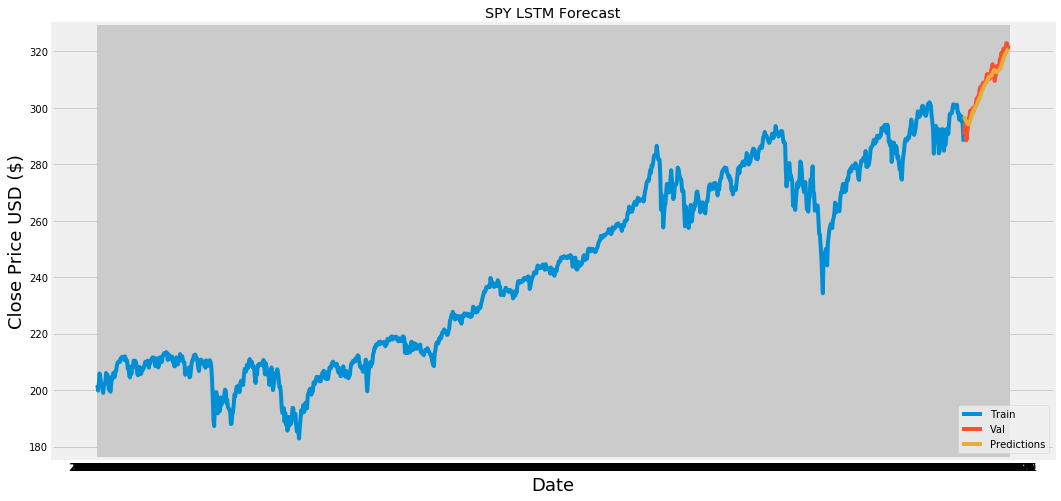

In [20]:
#Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
#Visualize the data
plt.figure(figsize=(16,8))
plt.title('SPY LSTM Forecast')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['close'])
plt.plot(valid[['close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.savefig('spy_lstm_forecast.png')
plt.show()

In [21]:
valid

,close,Predictions
date,,
2019-10-03,290.42,297.099304
2019-10-04,294.35,295.982452
2019-10-07,293.08,295.554535
2019-10-08,288.53,295.312225
2019-10-09,291.27,294.634613
...,...,...
2019-12-24,321.23,319.283173
2019-12-26,322.94,319.725861
2019-12-27,322.86,320.274078


In [22]:
valid['difference'] = valid['close'] - valid['Predictions']
valid['difference_pct'] = valid['difference']/valid['close']
valid['difference_pct'] = valid['difference_pct'].map("{:.2%}".format)
valid

C:\Users\jayar\anaconda\Anaconda3\envs\PandaSpace\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\jayar\anaconda\Anaconda3\envs\PandaSpace\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\jayar\anaconda\Anaconda3\envs\PandaSpace\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Tr

,close,Predictions,difference,difference_pct
date,,,,
2019-10-03,290.42,297.099304,-6.679304,-2.30%
2019-10-04,294.35,295.982452,-1.632452,-0.55%
2019-10-07,293.08,295.554535,-2.474535,-0.84%
2019-10-08,288.53,295.312225,-6.782225,-2.35%
2019-10-09,291.27,294.634613,-3.364613,-1.16%
...,...,...,...,...
2019-12-24,321.23,319.283173,1.946827,0.61%
2019-12-26,322.94,319.725861,3.214139,1.00%
2019-12-27,322.86,320.274078,2.585922,0.80%


In [23]:
valid.to_csv('spy_predictions_lstm.csv')

In [25]:
spylstm = pd.read_csv('spy_predictions_lstm.csv')
spylstm.tail(30)

,date,close,Predictions,difference,difference_pct
32,2019-11-18,312.02,309.73360,2.286388,0.73%
33,2019-11-19,311.93,310.33560,1.594398,0.51%
34,2019-11-20,310.77,310.86832,-0.098317,-0.03%
35,2019-11-21,310.27,311.16058,-0.890583,-0.29%
36,2019-11-22,310.96,311.25717,-0.297172,-0.10%
37,2019-11-25,313.37,311.34314,2.026860,0.65%
38,2019-11-26,314.08,311.70490,2.375105,0.76%
39,2019-11-27,315.48,312.21228,3.267720,1.04%
40,2019-11-29,314.31,312.88727,1.422732,0.45%
41,2019-12-02,311.64,313.39750,-1.757491,-0.56%


In [75]:
# #Get the quote
# spy_quote = web.DataReader('SPY', data_source='yahoo', start='2019-11-27', end='2020-01-10')
# #Create a new dataframe
# new_df = spy_quote.filter(['Close'])
# #Get teh last 60 day closing price values and convert the dataframe to an array
# last_60_days = new_df[-60:].values
# #Scale the data to be values between 0 and 1
# last_60_days_scaled = scaler.transform(last_60_days)
# #Create an empty list
# X_test = []
# #Append teh past 60 days
# X_test.append(last_60_days_scaled)
# #Convert the X_test data set to a numpy array
# X_test = np.array(X_test)
# #Reshape the data
# X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
# #Get the predicted scaled price
# pred_price = model.predict(X_test)
# #undo the scaling 
# pred_price = scaler.inverse_transform(pred_price)
# print(pred_price)

In [76]:
# spy_quote2 = web.DataReader('SPY', data_source='yahoo', start='2019-11-27', end='2020-01-10')
# print(spy_quote2['Close'])